In [13]:
# 12-1
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple 
from itertools import count 
from PIL import Image 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

env = gym.make('CartPole-v1').unwrapped
plt.ion()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

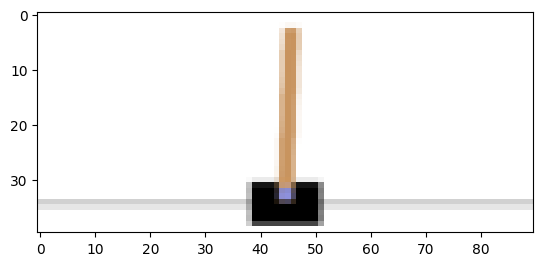

In [4]:
# 12-5
import pyglet
from PIL import Image

resize = T.Compose([T.ToPILImage(),
                    T.Resize(40, interpolation=Image.Resampling.BICUBIC),
                    T.ToTensor()])
def get_cart_location(screen_width):
    world_width = env.x_threshold * 2
    scale = screen_width / world_width
    return int(env.state[0] * scale + screen_width / 2.0)

def get_screen():
    screen = env.render(mode='rgb_array').transpose((2, 0, 1))
    _, screen_height, screen_width = screen.shape
    screen = screen[:, int(screen_height*0.4):int(screen_height * 0.8)]
    view_width = int(screen_width * 0.6)
    cart_location = get_cart_location(screen_width)

    if cart_location < view_width // 2:
        slice_range = slice(view_width)
    elif cart_location > (screen_width - view_width // 2):
        slice_range = slice(-view_width, None)
    else:
        slice_range = slice(cart_location - view_width // 2, cart_location + view_width // 2)
    screen = screen[:, :, slice_range]
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    return resize(screen).unsqueeze(0).to(device)

env.reset()
plt.figure()
plt.imshow(get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(), interpolation='none')
plt.show()

In [36]:
# 12-9
boarder = {'1': ' ' , '2': ' ', '3': ' ',
          '4': ' ' , '5': ' ', '6': ' ',
          '7': ' ' , '8': ' ', '9': ' '}

board_keys = []

for key in boarder:
    board_keys.append(key)

In [37]:
# 12-10
def visiual_Board(board_num):
    print(board_num['1'] + '|' + board_num['2'] + '|' + board_num['3'])
    print('-+-+-')
    print(board_num['4'] + '|' + board_num['5'] + '|' + board_num['6'])
    print('-+-+-')
    print(board_num['7'] + '|' + board_num['8'] + '|' + board_num['9'])

In [41]:
# 12-11
def game():
    turn = 'X'
    count = 0

    for i in range(8):
        visiual_Board(board)
        print("당신 차례입니다," + turn + ". 어디로 이동할까요?")
        move = input()
        if boarder[move] == ' ':
            boarder[move] = turn
            count += 1
        else:
            print("이미 채워져있습니다.\n어디로 이동할까요?")
            continue

        if count >= 5:
            if boarder['1'] == boarder['2'] == boarder['3'] != ' ':
                visual_Board(boarder)
                print("\n게임 종료.\n")
                print(" ----------- " + turn + "가 승리했습니다. --------")
                break

        
            elif boarder['4'] == boarder['5'] == boarder['6'] != ' ':
                visual_Board(boarder)
                print("\n게임 종료.\n")
                print(" ----------- " + turn + "가 승리했습니다. --------")
                break

            elif boarder['7'] == boarder['8'] == boarder['9'] != ' ':
                visual_Board(boarder)
                print("\n게임 종료.\n")
                print(" ----------- " + turn + "가 승리했습니다. --------")
                break

            elif boarder['1'] == boarder['4'] == boarder['7'] != ' ':
                visual_Board(boarder)
                print("\n게임 종료.\n")
                print(" ----------- " + turn + "가 승리했습니다. --------")
                break

            elif boarder['2'] == boarder['5'] == boarder['8'] != ' ':
                visual_Board(boarder)
                print("\n게임 종료.\n")
                print(" ----------- " + turn + "가 승리했습니다. --------")
                break

            elif boarder['3'] == boarder['6'] == boarder['9'] != ' ':
                visual_Board(boarder)
                print("\n게임 종료.\n")
                print(" ----------- " + turn + "가 승리했습니다. --------")
                break

            elif boarder['1'] == boarder['5'] == boarder['9'] != ' ':
                visual_Board(boarder)
                print("\n게임 종료.\n")
                print(" ----------- " + turn + "가 승리했습니다. --------")
                break

            elif boarder['3'] == boarder['5'] == boarder['7'] != ' ':
                visual_Board(boarder)
                print("\n게임 종료.\n")
                print(" ----------- " + turn + "가 승리했습니다. --------")
                break

        if count == 9:
            print("\n게임 종료.\n")
            print("동점입니다.")

        if turn =='X':
            turn = 'Y'
        else:
            turn = 'X'
if __name__ == "__main__":
    game()

NameError: name 'board' is not defined